In [ ]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [24]:
#  Load and inspect the dataset
try:
    data = pd.read_csv(r"C:\Users\Nanthini M\Downloads\Edunet\AI\Implementation\adult.csv")
except FileNotFoundError:
    print("[-] Error: adult.csv not found. Please ensure the file path is correct.")
    # As a fallback, try to load from a common public URL for demonstration
    try:
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
        columns = [
            'age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
            'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
            'hours-per-week', 'native-country', 'income'
        ]
        data = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)
        print("[+] Loaded data from public URL.")
    except Exception as e:
        print(f"Could not load data from URL either. Error: {e}")
        data = None

if data is not None:
    print("--- Initial Data Overview ---")
    print(data.head())
    print("\n--- Data Shape ---")
    print(data.shape)
    print("\n--- Missing Values Before Cleaning ---")
    print(data.isnull().sum())

# Step 3: Data Cleaning and Preprocessing
if data is not None:
    # Drop rows with any missing values for simplicity
    data.dropna(inplace=True)

    # Drop the 'fnlwgt' and 'education' columns (final weight is irrelevant for this task,
    # and educational-num is a numerical representation of education)
    data = data.drop(columns=['fnlwgt', 'education'])

    print("\n--- Data Shape After Cleaning ---")
    print(data.shape)


[-] Error: adult.csv not found. Please ensure the file path is correct.
[+] Loaded data from public URL.
--- Initial Data Overview ---
   age         workclass  fnlwgt  education  educational-num  \
0   39         State-gov   77516  Bachelors               13   
1   50  Self-emp-not-inc   83311  Bachelors               13   
2   38           Private  215646    HS-grad                9   
3   53           Private  234721       11th                7   
4   28           Private  338409  Bachelors               13   

       marital-status         occupation   relationship   race  gender  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hour

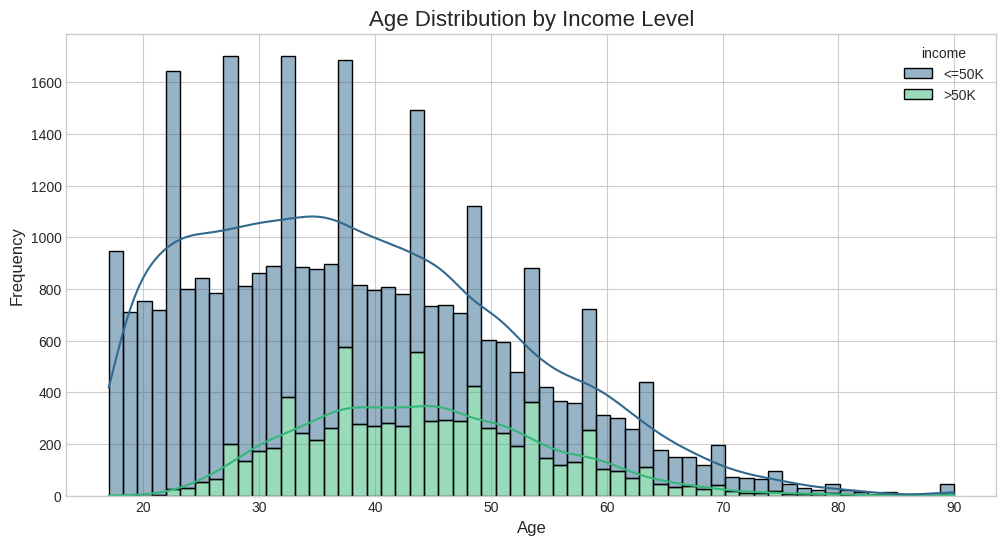

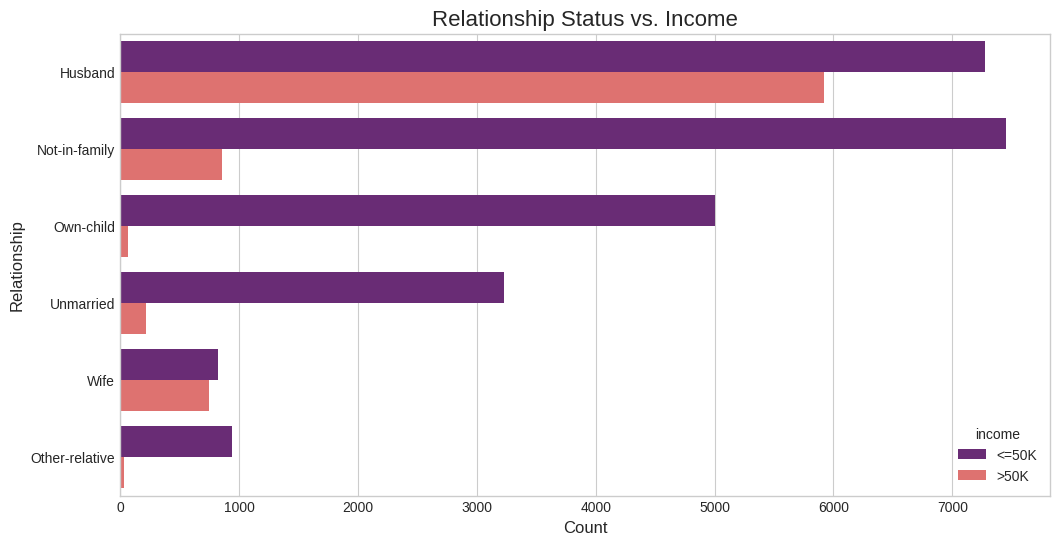

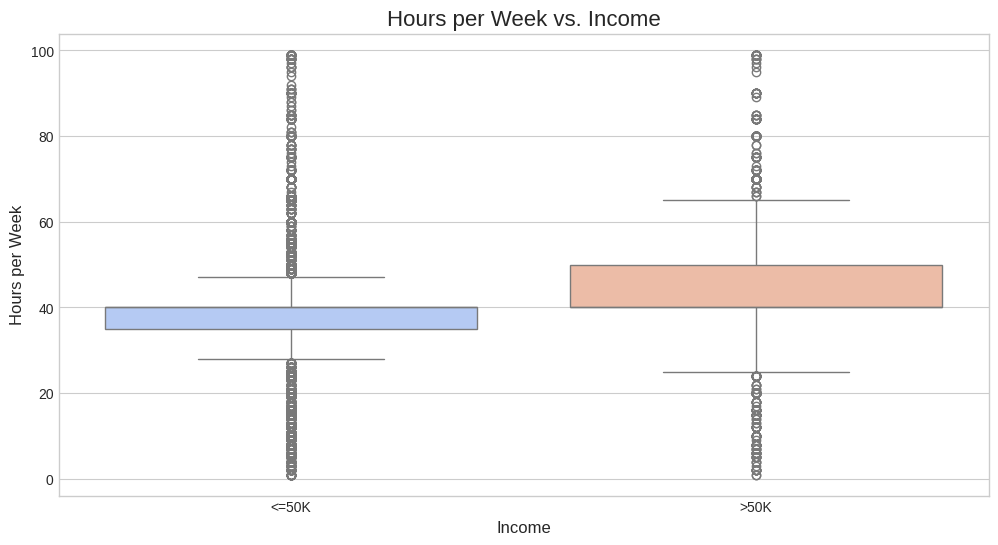

In [25]:
#Exploratory Data Analysis (EDA) with New Visualizations

if data is not None:
    plt.style.use('seaborn-v0_8-whitegrid')

    # Visualization 1: Histogram and KDE for Age Distribution by Income
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x='age', hue='income', multiple='stack', kde=True, palette='viridis')
    plt.title('Age Distribution by Income Level', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # Visualization 2: Count Plot for Relationship Status by Income
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, y='relationship', hue='income', palette='magma', order=data['relationship'].value_counts().index)
    plt.title('Relationship Status vs. Income', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Relationship', fontsize=12)
    plt.show()

    # Visualization 3: Box Plot for Hours per Week (to check outliers)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='income', y='hours-per-week', palette='coolwarm')
    plt.title('Hours per Week vs. Income', fontsize=16)
    plt.xlabel('Income', fontsize=12)
    plt.ylabel('Hours per Week', fontsize=12)
    plt.show()


In [28]:
# Feature Engineering (Label Encoding)
if data is not None:
    from sklearn.preprocessing import LabelEncoder

    # Identify categorical columns for encoding
    categorical_cols = data.select_dtypes(include=['object']).columns

    # Apply LabelEncoder
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

    print("\n--- Data Head After Encoding ---")
    print(data.head())



--- Data Head After Encoding ---
   age  workclass  educational-num  marital-status  occupation  relationship  \
0   39          7               13               4           1             1   
1   50          6               13               2           4             0   
2   38          4                9               0           6             1   
3   53          4                7               2           6             0   
4   28          4               13               2          10             5   

   race  gender  capital-gain  capital-loss  hours-per-week  native-country  \
0     4       1          2174             0              40              39   
1     4       1             0             0              13              39   
2     4       1             0             0              40              39   
3     2       1             0             0              40              39   
4     2       0             0             0              40               5   

   income 

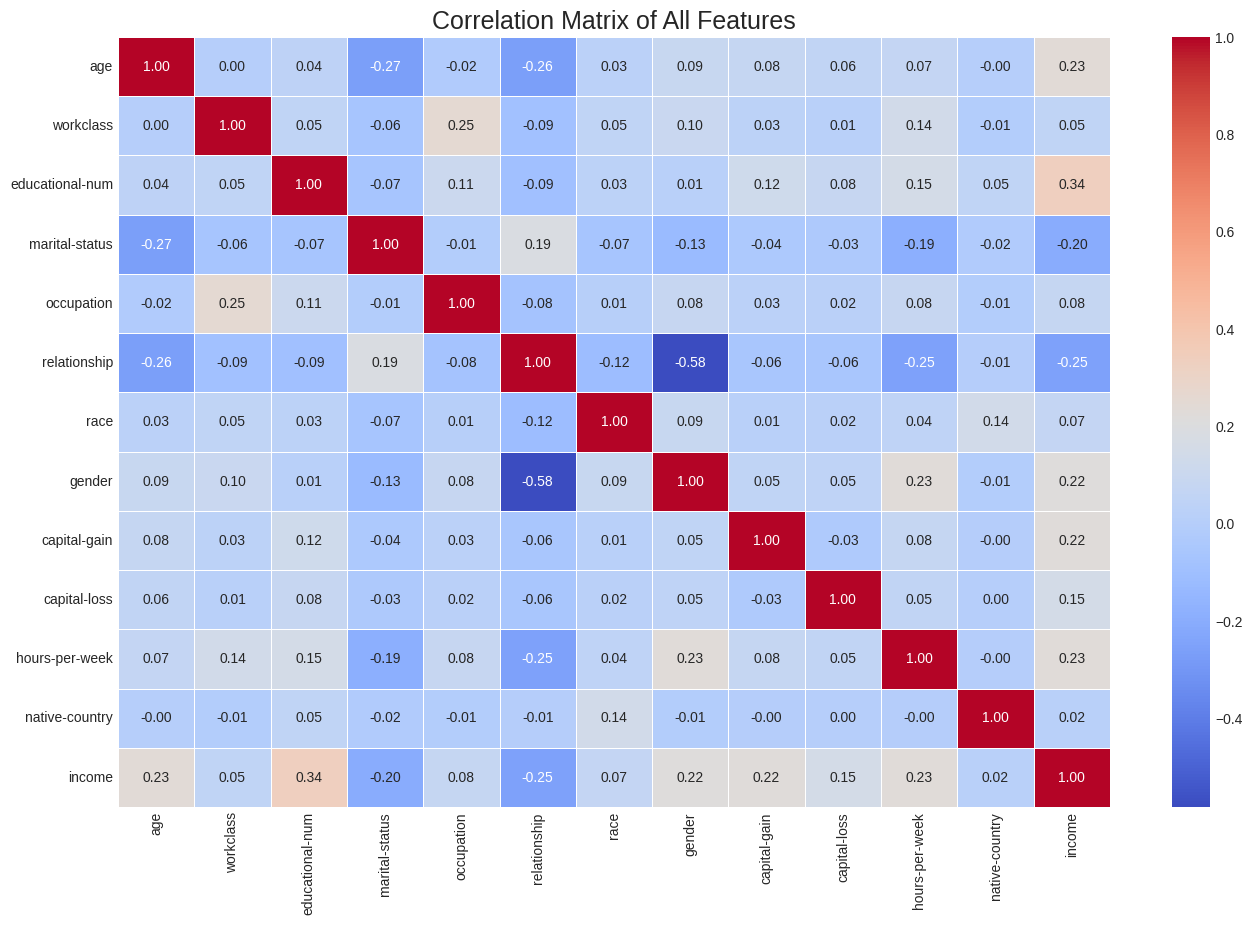

In [29]:
# Correlation Heatmap
if data is not None:
    plt.figure(figsize=(16, 10))
    sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of All Features', fontsize=18)
    plt.show()

In [38]:
# Model Training with Different Algorithms
if data is not None:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.preprocessing import StandardScaler

    # Define models
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from xgboost import XGBClassifier # Requires xgboost to be installed: pip install xgboost

    # Define features (X) and target (y)
    X = data.drop('income', axis=1)
    y = data['income']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Dictionary of models to train
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

    results = {}
    print("\n--- Model Training and Evaluation ---")
    for name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test_scaled)
        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"--- {name} ---")
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred))


--- Model Training and Evaluation ---
--- Logistic Regression ---
Accuracy: 0.8282
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6181
           1       0.72      0.47      0.57      1960

    accuracy                           0.83      8141
   macro avg       0.78      0.71      0.73      8141
weighted avg       0.82      0.83      0.81      8141

--- Decision Tree ---
Accuracy: 0.8202
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6181
           1       0.63      0.63      0.63      1960

    accuracy                           0.82      8141
   macro avg       0.75      0.76      0.75      8141
weighted avg       0.82      0.82      0.82      8141

--- AdaBoost ---
Accuracy: 0.8511
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6181
           1       0.77      0.54      0.64      1960

    accuracy             

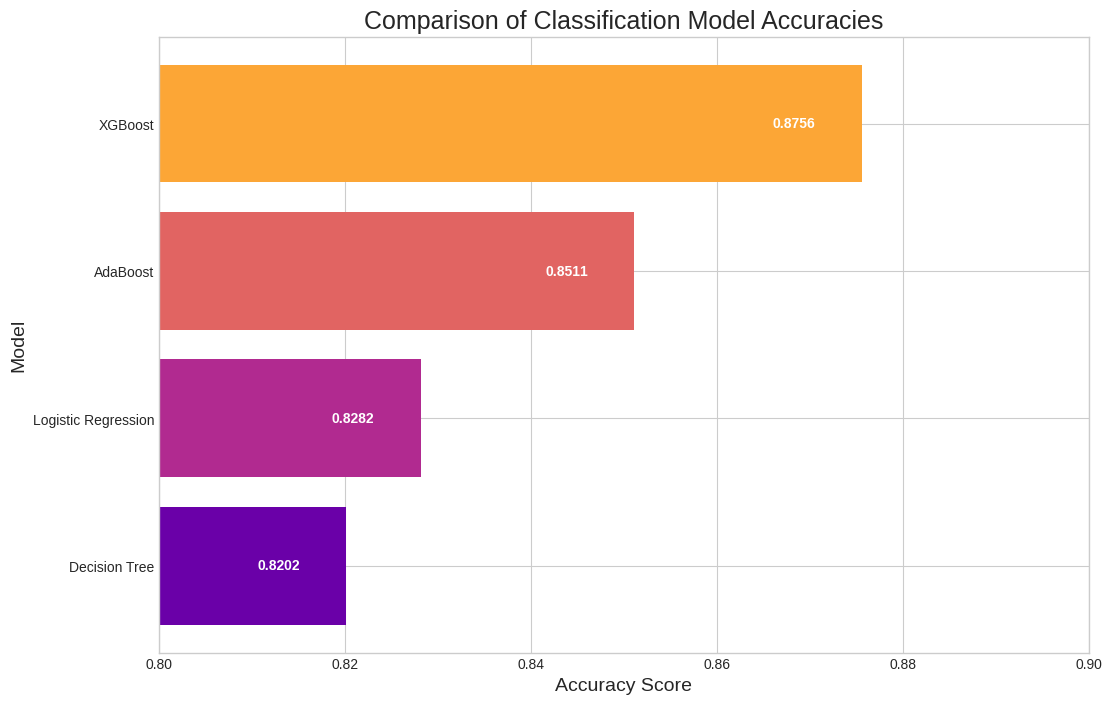

In [39]:
# Visualize Model Comparison with a Different Graph
if data is not None and results:
    # Sort models by accuracy for better visualization
    sorted_results = sorted(results.items(), key=lambda item: item[1])
    model_names, model_accuracies = zip(*sorted_results)

    # Create a horizontal bar plot
    plt.figure(figsize=(12, 8))
    bars = plt.barh(model_names, model_accuracies, color=sns.color_palette("plasma", len(model_names)))

    plt.xlabel('Accuracy Score', fontsize=14)
    plt.ylabel('Model', fontsize=14)
    plt.title('Comparison of Classification Model Accuracies', fontsize=18)
    plt.xlim(0.80, 0.90) # Adjust x-axis limits for better focus

    # Add accuracy values on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width - 0.005, bar.get_y() + bar.get_height()/2, f'{width:.4f}', ha='right', va='center', color='white', fontweight='bold')

    plt.show()

In [42]:
# Save the Best Model and Create Streamlit App
if data is not None and results:
    # Find the best model
    best_model_name = max(results, key=results.get)
    best_model = models[best_model_name]

    print(f"\n✅ Best performing model is '{best_model_name}' with an accuracy of {results[best_model_name]:.4f}.")

    # We need to save the scaler as well to use it in the app
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(best_model, 'best_model_v2.pkl')
    for col, le in label_encoders.items():
        joblib.dump(le, f'le_{col}.pkl')

    print("✅ Best model, scaler, and label encoders saved successfully.")


✅ Best performing model is 'XGBoost' with an accuracy of 0.8756.
✅ Best model, scaler, and label encoders saved successfully.


In [41]:
# writefile app_v2.py
import streamlit as st
import pandas as pd
import joblib

# --- Load Artifacts ---
try:
    model = joblib.load("best_model_v2.pkl")
    scaler = joblib.load("scaler.pkl")
    # Load all the label encoders
    label_encoders = {}
    # Update with your categorical columns
    cat_cols_for_app = [
        'workclass', 'marital-status', 'occupation', 'relationship', 'race',
        'gender', 'native-country'
    ]
    for col in cat_cols_for_app:
        label_encoders[col] = joblib.load(f"le_{col}.pkl")

    # Use a dummy income encoder just for the final output label
    le_income = joblib.load("le_income.pkl")

except FileNotFoundError:
    st.error("Model artifacts not found. Please train the model first by running the main script.")
    st.stop()


# --- Streamlit App UI ---
st.set_page_config(page_title="Income Predictor", page_icon="💰", layout="wide")

st.title("👨‍💼 Income Prediction App")
st.markdown("This app predicts whether an individual's income is **>50K** or **<=50K** a year based on census data.")

# Create columns for inputs
col1, col2, col3 = st.columns(3)

with col1:
    age = st.slider("Age", 17, 90, 37)
    workclass = st.selectbox("Work Class", options=label_encoders['workclass'].classes_)
    hours_per_week = st.slider("Hours per Week", 1, 99, 40)
    native_country = st.selectbox("Native Country", options=label_encoders['native-country'].classes_)


with col2:
    marital_status = st.selectbox("Marital Status", options=label_encoders['marital-status'].classes_)
    occupation = st.selectbox("Occupation", options=label_encoders['occupation'].classes_)
    gender = st.selectbox("Gender", options=label_encoders['gender'].classes_, index=1)
    capital_gain = st.number_input("Capital Gain", min_value=0, value=0)


with col3:
    educational_num = st.slider("Years of Education", 1, 16, 10)
    relationship = st.selectbox("Relationship", options=label_encoders['relationship'].classes_)
    race = st.selectbox("Race", options=label_encoders['race'].classes_)
    capital_loss = st.number_input("Capital Loss", min_value=0, value=0)


# Create a DataFrame from the user inputs
input_data = {
    'age': age,
    'workclass': workclass,
    'educational-num': educational_num,
    'marital-status': marital_status,
    'occupation': occupation,
    'relationship': relationship,
    'race': race,
    'gender': gender,
    'capital-gain': capital_gain,
    'capital-loss': capital_loss,
    'hours-per-week': hours_per_week,
    'native-country': native_country,
}
input_df = pd.DataFrame([input_data])

st.write("### User Input")
st.dataframe(input_df)


# Transform categorical data using loaded label encoders
for col, le in label_encoders.items():
    if col in input_df.columns:
         input_df[col] = le.transform(input_df[col])


# --- Prediction Logic ---
if st.button("Predict Income", type="primary"):
    # Scale the input data using the loaded scaler
    scaled_input = scaler.transform(input_df)

    # Make a prediction
    prediction_code = model.predict(scaled_input)
    prediction_proba = model.predict_proba(scaled_input)

    # Decode the prediction back to the original label (e.g., '>50K')
    predicted_label = le_income.inverse_transform(prediction_code)[0]

    st.markdown("---")
    st.subheader("Prediction Result")

    if predicted_label == '>50K':
        st.success(f"**Predicted Income: {predicted_label}**")
    else:
        st.info(f"**Predicted Income: {predicted_label}**")

    # Display probabilities
    st.write("Prediction Probabilities:")
    prob_df = pd.DataFrame(prediction_proba, columns=le_income.classes_, index=["Probability"])
    st.dataframe(prob_df)


2025-07-20 05:03:07.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 05:03:07.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 05:03:07.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 05:03:07.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 05:03:07.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 05:03:07.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 05:03:07.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 05:03:07.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar